## Introduction to matplotlib

`matplotlib` is the Python plotting package to rule them all. Not because it's the best. Or the easiest to use. Or the fastest. Or... wait, why is it the number 1 plotting package? Nobody knows! But it's everywhere, and making basic plots is... fine. It's really fine.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

Let's get some well data to play with.

In [2]:
dt = np.load("../data/B-41_DT.npy")
rhob = np.load("../data/B-41_RHOB.npy")
depth = np.load("../data/B-41_DEPTH.npy")

## First steps

The first step is usually just a quick plot.

If we have a simple 1D array of numbers, we just pass `y`, and `x` will be generated from the indices of the elements.

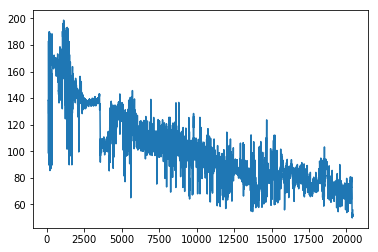

In [3]:
plt.plot(dt)

If you have another parameter, you can do `plt.plot(x, y)`.

### Exercise

- Can you plot a smaller segment of the data?
- Try to plot the data vertically.
- Add `'r-o'` to your call to plot. It means 'red, line, circles'.
- What happens if you add another line with `plt.ylim(830, 880)`?
- Can you disply the whole well with 0 at the top?
- Try adding `plt.figure(figsize=(2,10))` at the start.

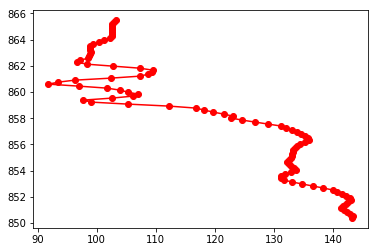

In [4]:
plt.plot(dt[3500:3600], depth[3500:3600], 'r-o')

(830, 880)

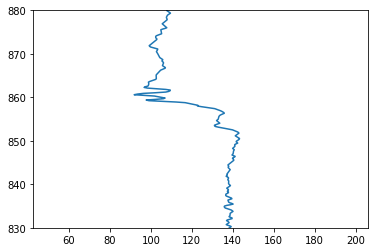

In [5]:
plt.plot(dt, depth)
plt.ylim(830, 880)

(830, 880)

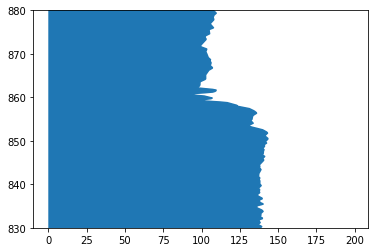

In [6]:
plt.plot(dt, depth)
plt.fill_betweenx(depth, 0, dt)
plt.ylim(830, 880)

(830, 880)

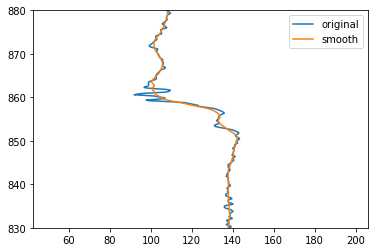

In [7]:
dtsm = np.convolve(np.ones(21)/21, dt, mode='same')

plt.plot(dt, depth, label='original')
plt.plot(dtsm, depth, label='smooth')
plt.legend()
plt.ylim(830, 880)

(3550.3359999988334, 0)

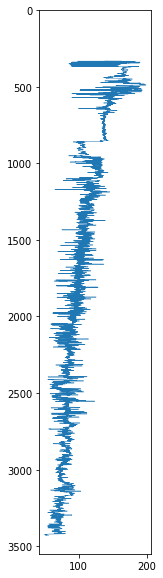

In [8]:
plt.figure(figsize=(2,10))
plt.plot(dt, depth, lw=0.5)
plt.ylim(depth[-1]+100, 0)

Text(0.5,1,'DT log')

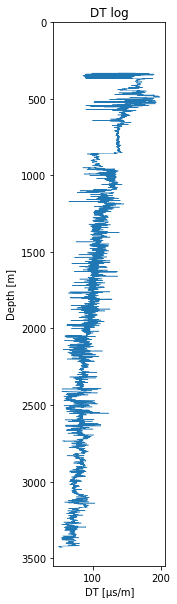

In [9]:
plt.figure(figsize=(2,10))
plt.plot(dt, depth, lw=0.5)
plt.ylim(depth[-1]+100, 0)
plt.xlabel('DT [µs/m]')
plt.ylabel('Depth [m]')
plt.title('DT log')

### `plt.scatter()`

It's also easy to make scatter plots:

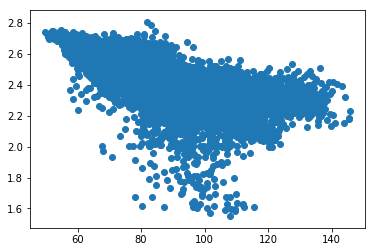

In [10]:
plt.scatter(dt, rhob)

We can adjust how the points plot to make it more interesting:

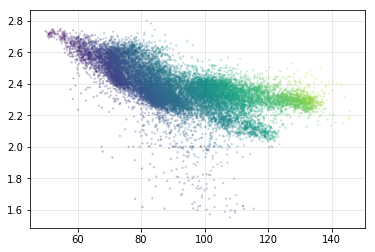

In [11]:
plt.scatter(dt, rhob, c=dt*rhob, s=2, alpha=0.2)
plt.grid(c='k', alpha=0.1)

### `plt.hist()` and `plt.bar()`

In [12]:
hist = np.histogram(dt, bins=20)

ValueError: range parameter must be finite.

In [13]:
dt.min(), dt.max()

(nan, nan)

In [14]:
rng = np.nanmin(dt), np.nanmax(dt)

It turns out that `np.histogram` struggles with NaNs, because it can't do the gt/lt comparisons it needs to do on the data. So now that we have the 'real' min and max, we can remove make a new DT curve without NaNs and they will be left out of the analysis.

In [15]:
dtn = dt[~np.isnan(dt)]

Luckily, `matplotlib` has a histogram plotting function:

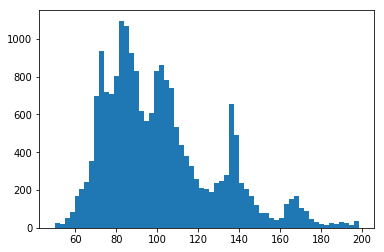

In [16]:
n, bins, _ = plt.hist(dtn, bins='auto', range=rng)

Let's get the data and make our own bar chart. First, we have to compute the bin centres:

In [17]:
n.size, bins.size

(61, 62)

In [18]:
bins = (bins[1:] + bins[:-1]) / 2

<Container object of 61 artists>

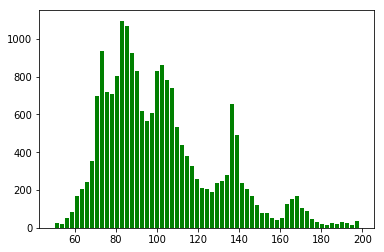

In [19]:
plt.bar(bins, n, width=2, color='g')

## `plt.imshow()` for raster data

For image-like data, such as slices of seismic, we need a different kind of visualization. 

NB There's also `plt.pcolor` but it's very slow. Use `plt.pcolormesh` instead.

Let's load some seismic data from a SEG-Y flie.

In [20]:
import segyio

with segyio.open('../data/Penobscot_0-1000ms.sgy') as s:
    vol = segyio.cube(s)

In [22]:
vol.shape

(601, 481, 251)

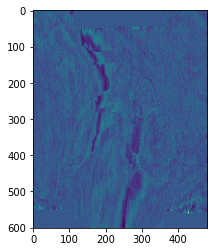

In [23]:
amp = vol[:, :, 200]

plt.imshow(amp)

We need to change the aspect ratio:

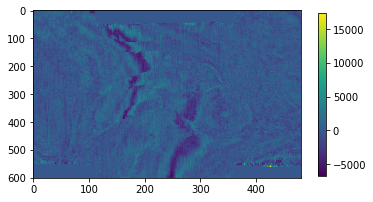

In [29]:
plt.imshow(amp, aspect=0.5)
plt.colorbar(shrink=0.75)

And fix the colorbar:

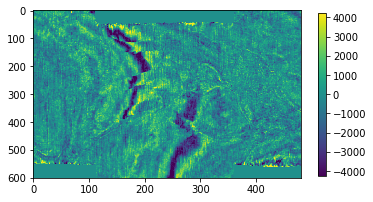

In [30]:
ma = np.percentile(vol, 98)

plt.imshow(amp, aspect=0.5, vmin=-ma, vmax=ma)
plt.colorbar(shrink=0.75)

### Exercise

- Try plotting a vertical section through the data. You'll need to think about indexing into `vol`.
- Can you make a histogram of the amplitudes? Remember the NaNs!

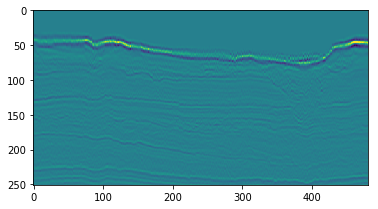

In [31]:
plt.imshow(vol[200, :, :].T)

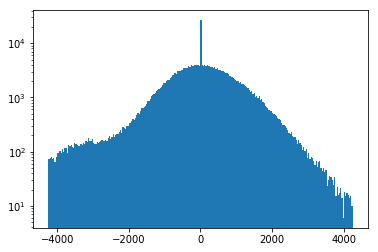

In [32]:
ampn = amp[~np.isnan(amp)]
n, bins, _ = plt.hist(ampn, bins='auto', range=(-ma, ma))
plt.yscale('log', nonposy='clip')

## More `imshow` options

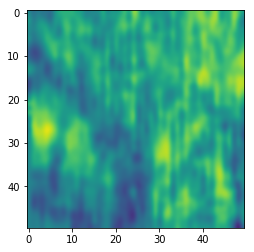

In [33]:
plt.imshow(amp[:50, :50], interpolation='bicubic')

We can choose new colourmaps easily, and post the colorbar.

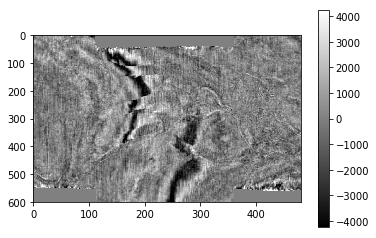

In [34]:
plt.imshow(amp, aspect=0.5, cmap='gray', vmin=-ma, vmax=ma)
plt.colorbar()

Note too that matplotlib colourmaps all have reversed versions, just add `_r` to the end of the name.

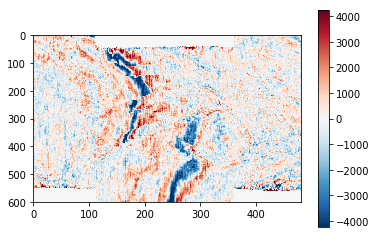

In [35]:
plt.imshow(amp, aspect=0.5, cmap='RdBu_r', vmin=-ma, vmax=ma)
plt.colorbar()

We can give the image real-world extents:

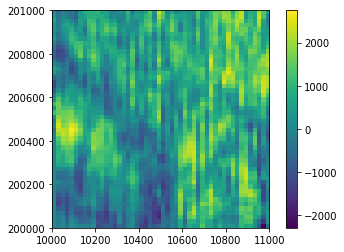

In [36]:
plt.imshow(amp[:50, :50], extent=[10000, 11000, 200000, 201000])
plt.colorbar()

Notice that `plt.imshow()` assumes your pixels are sqaure. I find that I usually want to make this assumption.

## The other way to plot rasters: `pcolormesh()`

Sometimes you might have varying cell sizes or shapes, or want to render the edges of the cells. Then you can use `pcolormesh()`. 

Read these articles to help figure out when to use what:

- http://thomas-cokelaer.info/blog/2014/05/matplotlib-difference-between-pcolor-pcolormesh-and-imshow/
- https://stackoverflow.com/questions/21166679/when-to-use-imshow-over-pcolormesh

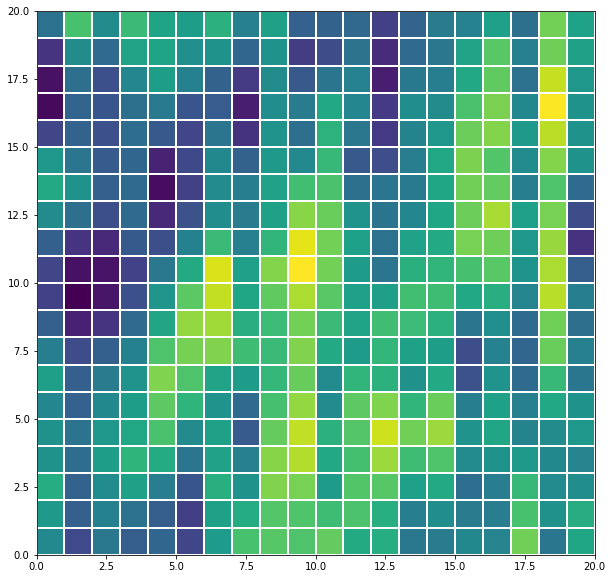

In [37]:
plt.figure(figsize=(10,10))
plt.pcolormesh(amp[:20, :20], edgecolors=['white'], lw=1)
plt.show()

## Adding decoration

So far we've kept most of our calls to matplotlib to one line or so.

Things can get much, much more complicated... The good news is that plots are usually built up, bit by bit. So you start with the one-liner, then gradually add things:

In [38]:
hor = np.load("../data/Penobscot_Seabed.npy")

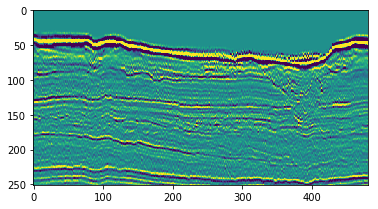

In [39]:
plt.imshow(vol[200, :, :].T, vmin=-ma, vmax=ma)

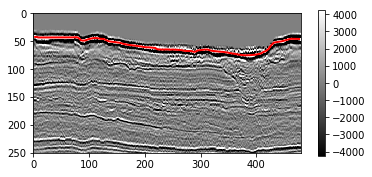

In [40]:
plt.imshow(vol[200, :, :].T, cmap="gray", vmin=-ma, vmax=ma)
plt.plot(hor[200, :], 'r', lw=2)
plt.colorbar(shrink=0.67)

Text(0,0.5,'Time [ms]')

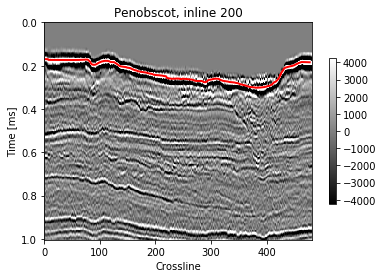

In [41]:
inl, xl, ts = vol.shape
extent = [0, xl, ts*0.004, 0]  # left, right, bottom, top
plt.imshow(vol[200, :, :].T, cmap="gray", vmin=-ma, vmax=ma, extent=extent, aspect='auto')
plt.plot(0.004 * hor[200, :], 'r', lw=2)
plt.colorbar(shrink=0.67)
plt.title("Penobscot, inline 200")
plt.xlabel("Crossline")
plt.ylabel("Time [ms]")

If things get more complicated than this, we need to switch to the so-called 'objected oriented' way to use matplotlib.

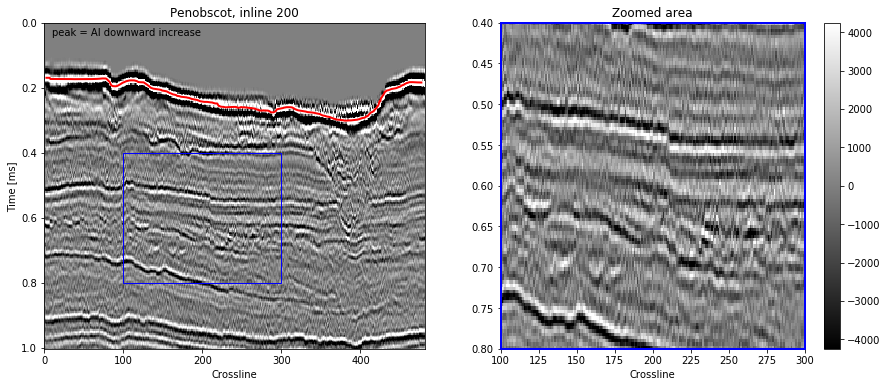

In [42]:
import matplotlib.patches as patches

fig, axs = plt.subplots(figsize=(15, 6), ncols=2)

ax = axs[0]
im = ax.imshow(vol[200, :, :].T, cmap="gray", vmin=-ma, vmax=ma, extent=extent, aspect='auto')
cb = fig.colorbar(im)
ax.plot(0.004 * hor[200, :], 'r', lw=2)
rect = patches.Rectangle((100, 100*0.004), 200, 100*0.004, lw=1, ec='b', fc='none')
ax.add_patch(rect)
ax.set_title("Penobscot, inline 200")
ax.set_xlabel("Crossline")
ax.set_ylabel("Time [ms]")
ax.text(10, 0.04, "peak = AI downward increase")

ax = axs[1]
ax.imshow(vol[200, 100:300, 100:200].T, extent=[100, 300, 0.8, 0.4], aspect='auto', cmap='gray', vmin=-ma, vmax=ma)
plt.setp(ax.spines.values(), color='b', lw=2)
ax.set_title('Zoomed area')
ax.set_xlabel("Crossline")

plt.savefig("../data/my_figure.png", dpi=300)
plt.savefig("../data/my_figure.svg")

plt.show()

## How complicated do you want to get?

It turns out you can do almost anything in `matplotlib`. This is a `matplotlib` figure:

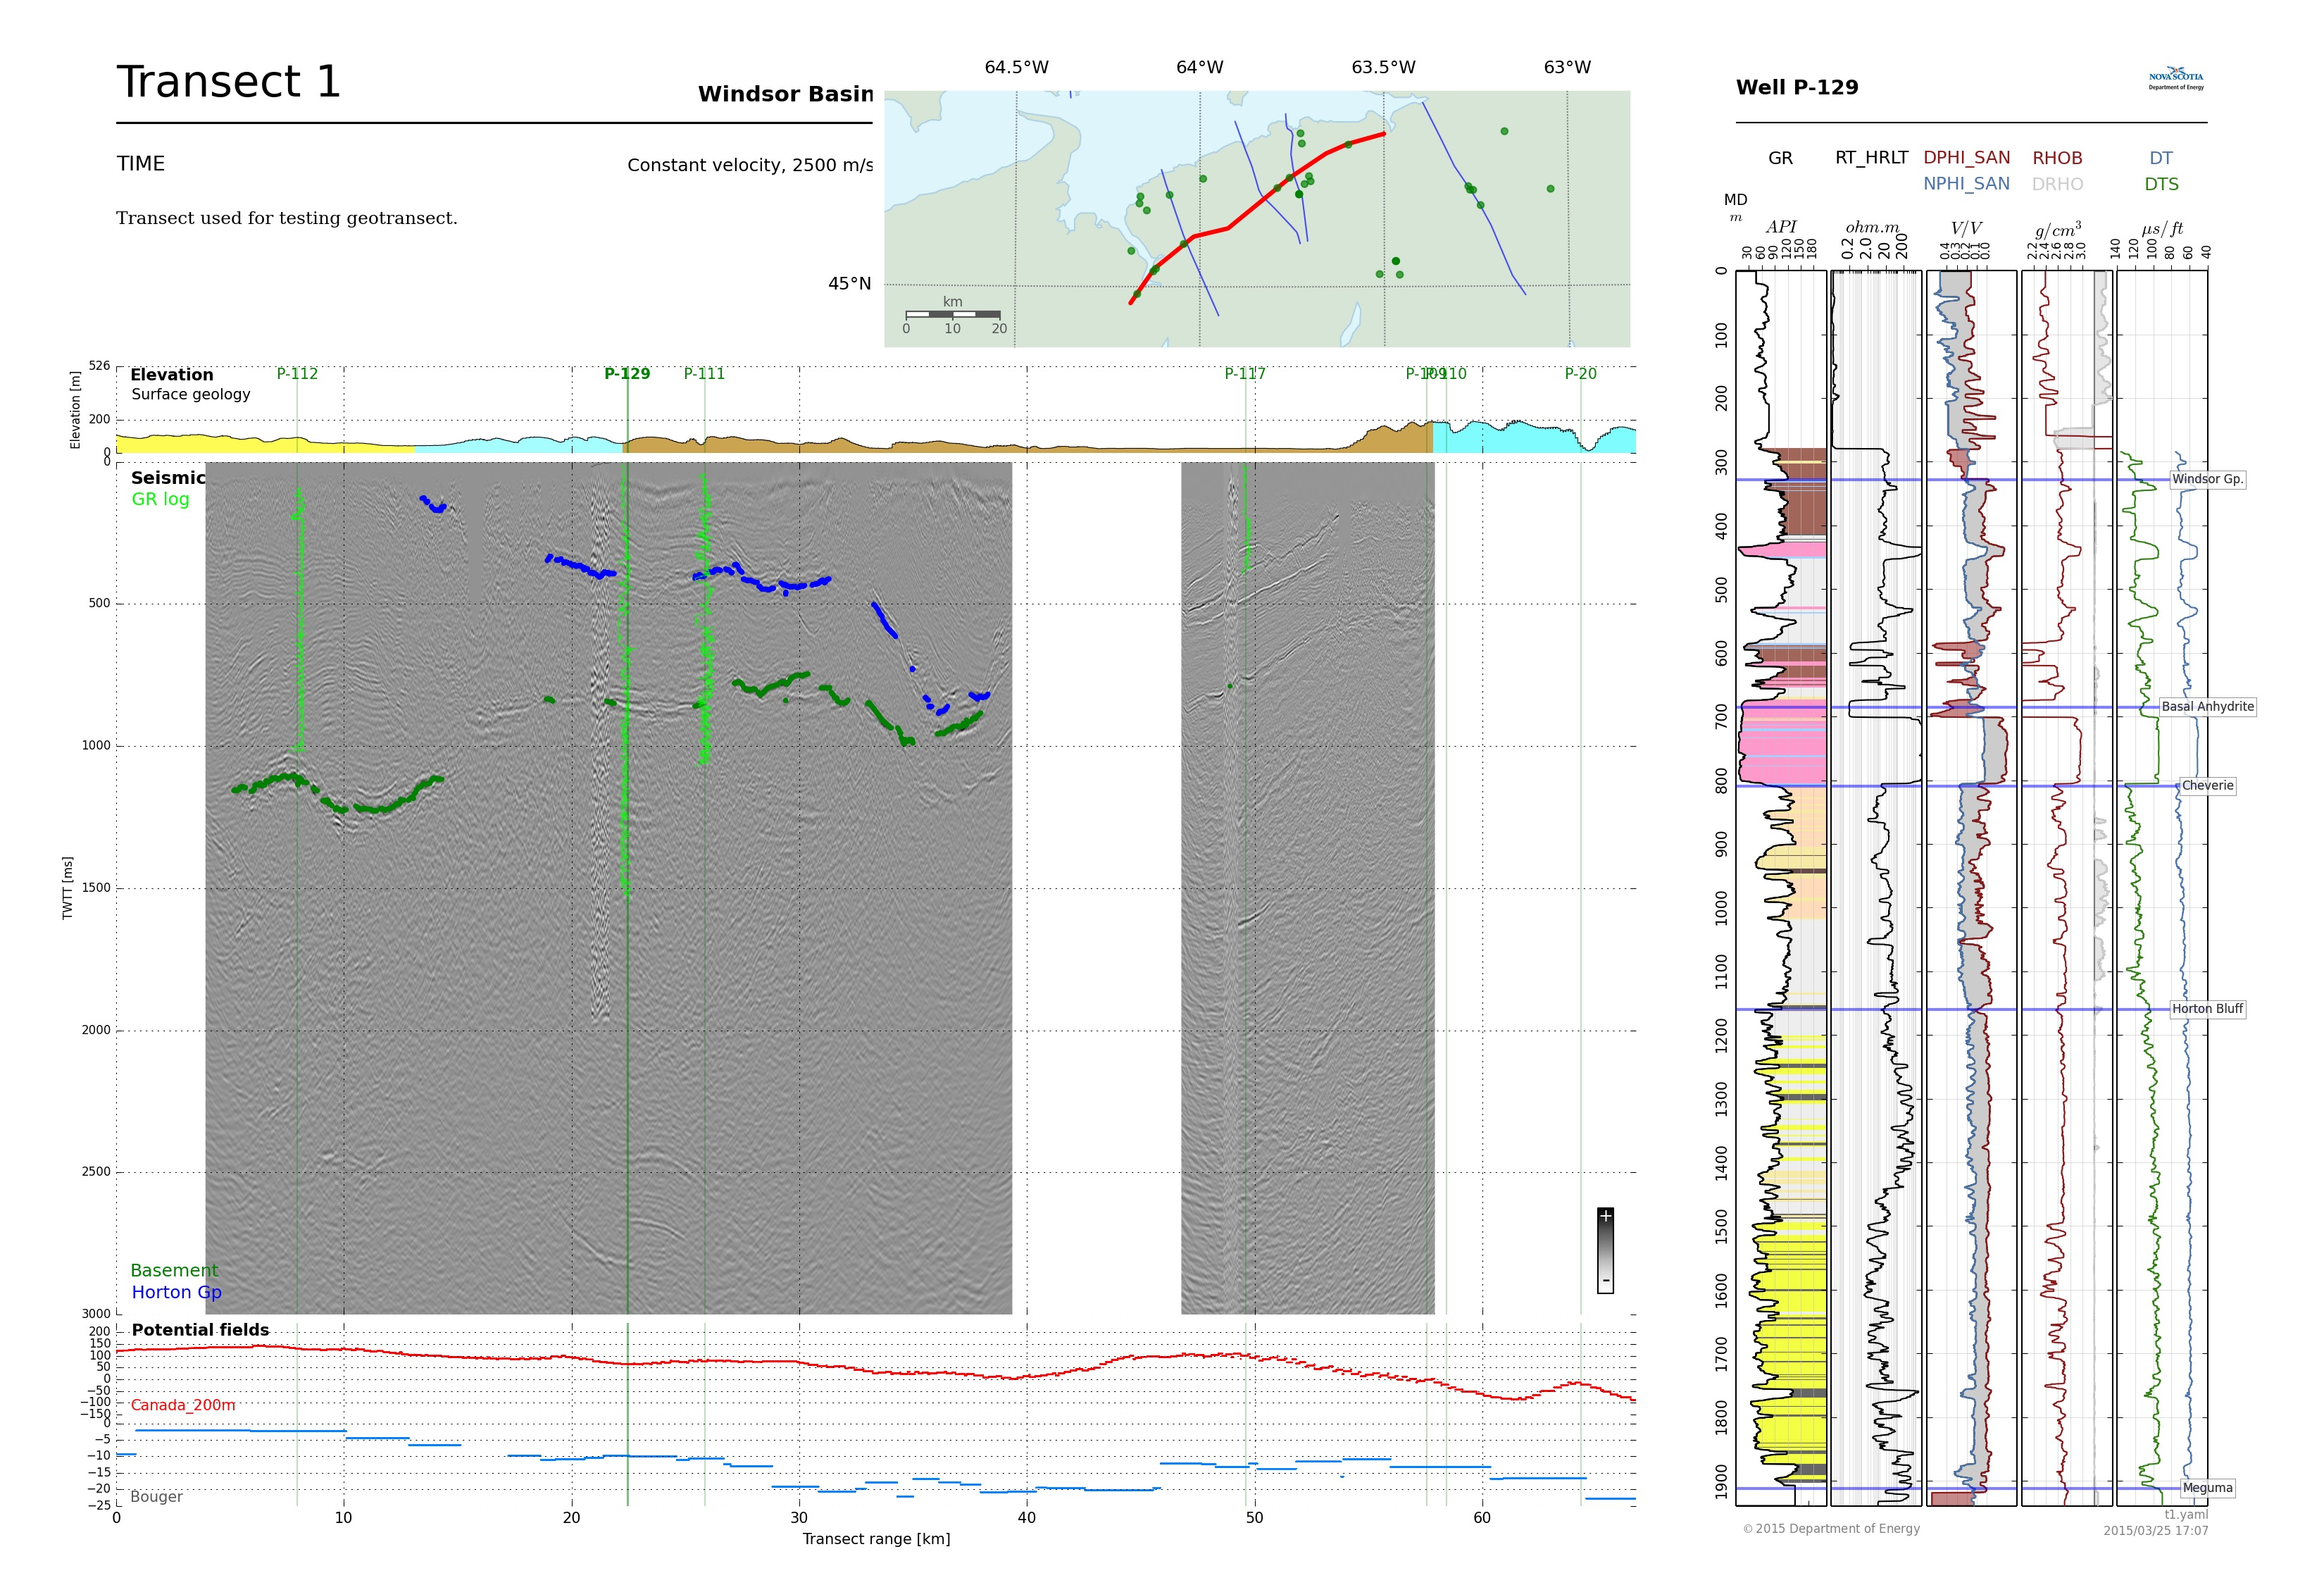

In [7]:
from IPython.display import Image
Image('../data/t1.jpg')

The key method you need to make a tiled plot like this is [`gridspec`](https://matplotlib.org/users/gridspec.html). You will also need a lot of patience.

## Interactive plots

There are a few ways to achieve interactivity. We look at some of them in [`Intro_to_interactivity.ipynb`](Intro_to_interactivity.ipynb). Here's a quick example:

In [35]:
from ipywidgets import interact

@interact(t=(0, 450, 10))
def show(t):
    plt.imshow(vol[:, :, t], vmin=-ma, vmax=ma, aspect=0.5)
    plt.colorbar(shrink=0.75)
    plt.show()

A Jupyter Widget

## Seaborn... KDE plots, better scatters, and more

Unfortunately, there's no density plot built into `matplotlib`, but the plotting library `seaborn` does have one. (So does `pandas`.)

Let's look again at [distributions uaing `seaborn`](https://seaborn.pydata.org/tutorial/distributions.html).

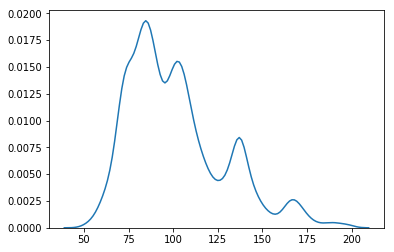

In [36]:
import seaborn as sns
sns.kdeplot(dtn)

We can change the bandwidth of the Gaussian:

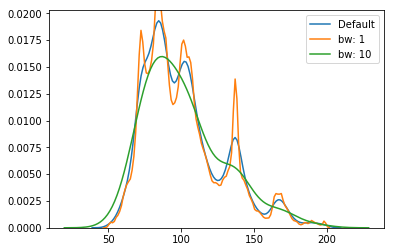

In [37]:
sns.kdeplot(dtn, label="Default")
sns.kdeplot(dtn, bw=1, label="bw: 1")
sns.kdeplot(dtn, bw=10, label="bw: 10")
plt.legend();

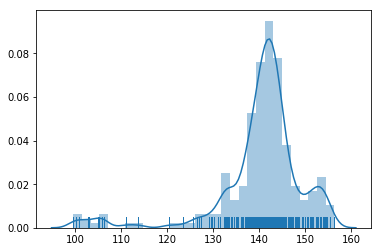

In [38]:
sns.distplot(dtn[2000:2250], rug=True)

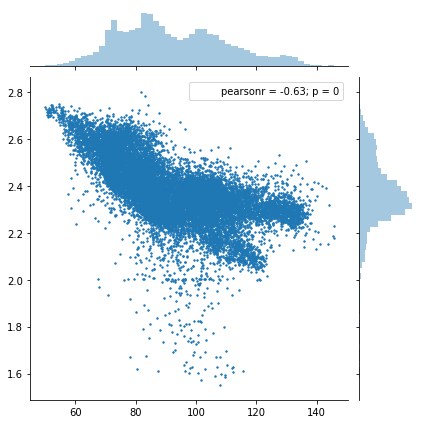

In [39]:
sns.jointplot(dt, rhob, s=2)

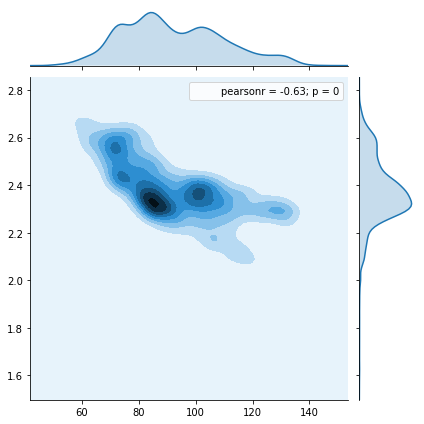

In [40]:
sns.jointplot(dt, rhob, kind='kde')